<a href="https://colab.research.google.com/github/0x416C657852/DiceClassificationCNN/blob/main/DiceClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
import os
import cv2
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
train_files = glob.glob('/content/drive/MyDrive/dice/train/*/*')
len(train_files)

14312

In [11]:
test_files = glob.glob('/content/drive/MyDrive/dice/valid/*/*')
len(test_files)

2122

In [19]:
image_size = (480, 480)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dice/train",
    validation_split=0.2,
    subset="training",
    seed=420,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dice/valid",
    validation_split=0.2,
    subset="validation",
    seed=420,
    image_size=image_size,
    batch_size=batch_size,
)

Found 14312 files belonging to 6 classes.
Using 11450 files for training.
Found 2122 files belonging to 6 classes.
Using 424 files for validation.


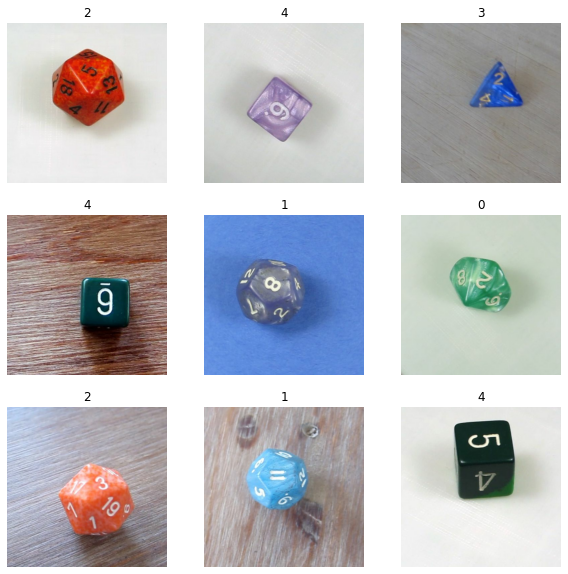

In [20]:
import matplotlib.pyplot as plt#displaying some images.

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
